## ISYE 6740 - Assignment 4 -  Dimensionality Reduction

Run the following block to hide all the output warnings:

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Q1) Dimensionality Reduction -  Punctured Sphere

* For Question 1, the dataset consists of data points in $\mathrm{R}^3$ with different colors. The first three columns of the dataset are the 3D-coordinates of points and the last three columns are R (red),G (green), and B (blue) values respectively, which indicate the colors of points. We will use PCA, Isomap and t-SNE, respectively, to project this dataset to a lower dimensional space. 

* Please refer to the following package for PCA:\
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

* Please refer to the following package for Isomap:\
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html

* Please refer to the following package for t-SNE:\
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html


In [3]:
df1 = pd.read_csv('./Question1.csv')

#### a) Plot the given dataset using 3D scatter plot (color the datapoints by the given rgb value).

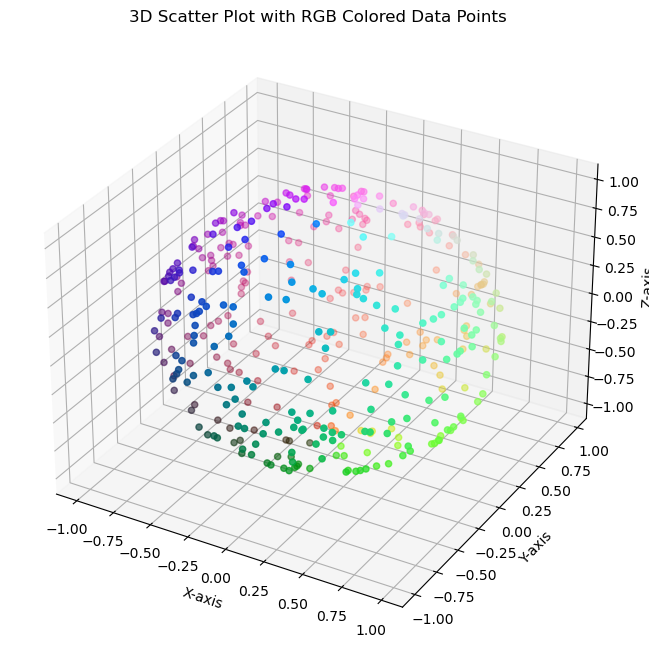

In [4]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extracting coordinates and RGB values
x = df1.iloc[:, 0]
y = df1.iloc[:, 1]
z = df1.iloc[:, 2]
colors = df1.iloc[:, 3:6]  # Assuming RGB values are in columns 3, 4, and 5

# Plotting the 3D scatter plot
sc = ax.scatter(x, y, z, c=colors)

# Set labels for axes
ax.set_title('3D Scatter Plot with RGB Colored Data Points')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

#### b) Apply PCA on the given dataset and plot it in 2D (color the datapoints by the given rgb value).

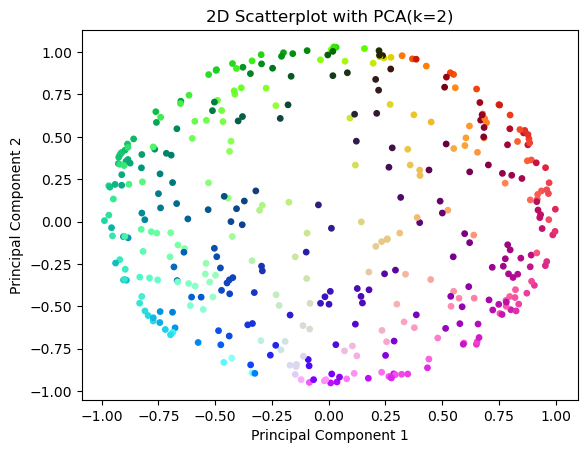

In [5]:
from sklearn.decomposition import PCA

# Extracting the 3D coordinates and RGB values
X = df1.iloc[:, 0:3].values
colors = df1.iloc[:, 3:6].values  # RGB values are in columns 3, 4, and 5

# Applying PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting the 2D PCA-transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, s=15)

# Set labels for axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Scatterplot with PCA(k=2)')

plt.show()


#### c) Apply Isomap on the given dataset and plot it in 2D, try n_neighbors=5, 10, 15 (color the datapoints by the given rgb value).

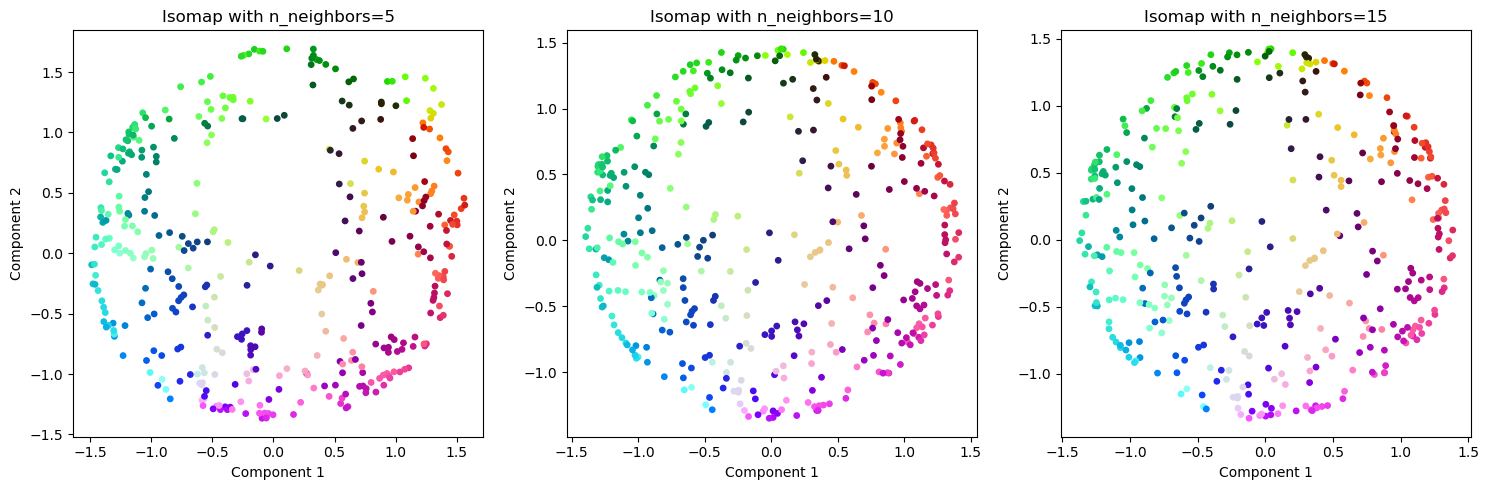

In [6]:
from sklearn.manifold import Isomap

# Extracting the 3D coordinates and RGB values
X = df1.iloc[:, 0:3].values
colors = df1.iloc[:, 3:6].values

# Different values of n_neighbors to explore
n_neighbors_values = [5, 10, 15]

plt.figure(figsize=(15, 5))

for i, n_neighbors in enumerate(n_neighbors_values, 1):
    # Applying Isomap for dimensionality reduction
    iso = Isomap(n_neighbors=n_neighbors, n_components=2)
    X_iso = iso.fit_transform(X)

    plt.subplot(1, len(n_neighbors_values), i)
    plt.scatter(X_iso[:, 0], X_iso[:, 1], c=colors, s=15)  
    plt.title(f'Isomap with n_neighbors={n_neighbors}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')

plt.tight_layout()
plt.show()


#### d) Apply t-SNE on the given dataset and plot it in 2D, Try perplexity=10, 20, 30, 40, 50 (color the datapoints by the given rgb value). Use PCA to initialize t-SNE by setting init='pca'.

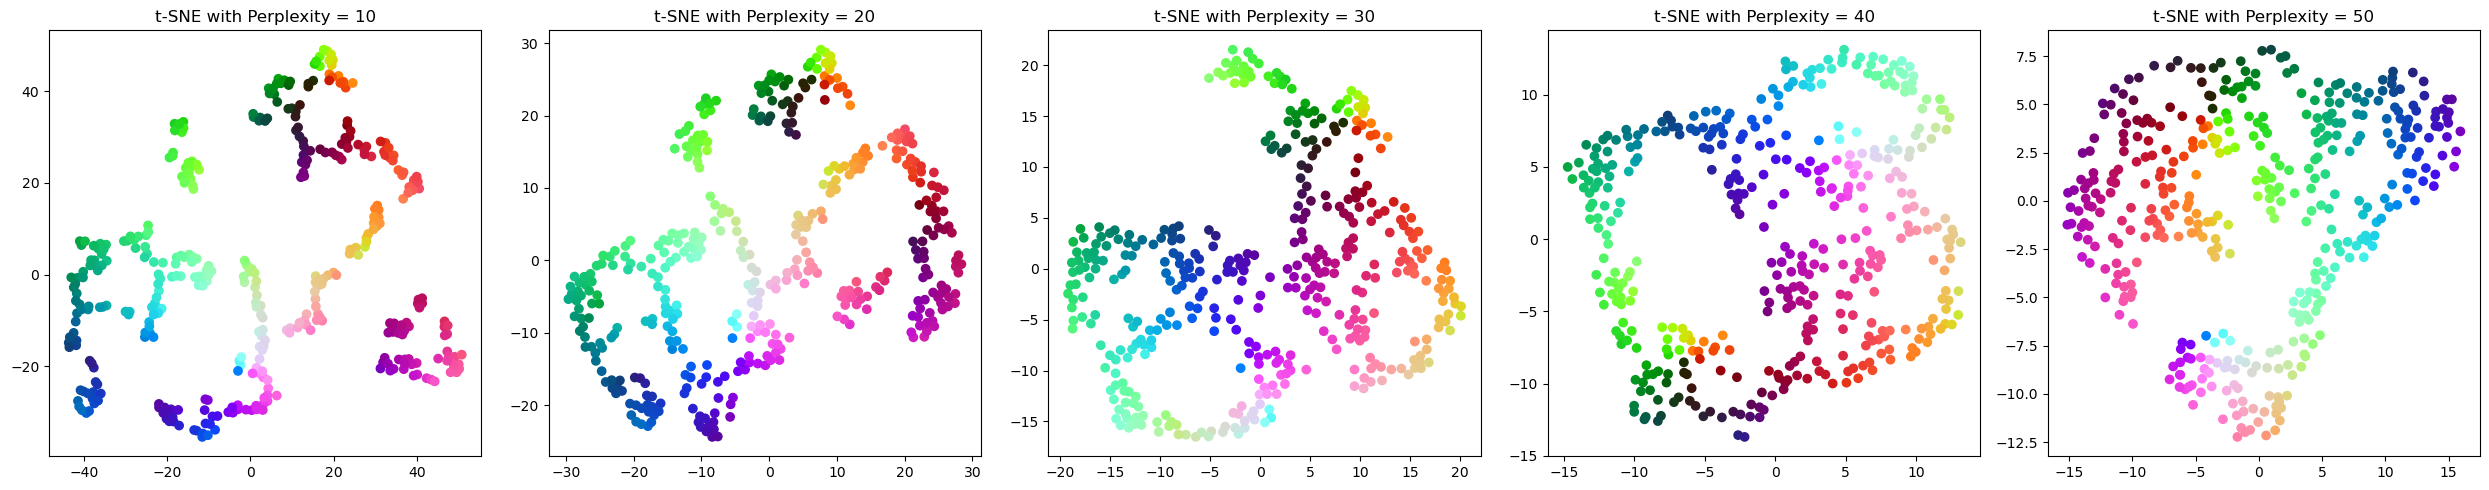

In [7]:
from sklearn.manifold import TSNE

# Extracting the 3D coordinates and RGB values
X = df1.iloc[:, 0:3].values
colors = df1.iloc[:, 3:6].values  # RGB values are in columns 3, 4, and 5

# Different values of perplexity to explore
perplexity_values = [10, 20, 30, 40, 50]

# Plotting the results
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for i, perplexity in enumerate(perplexity_values):
    # Applying t-SNE for dimensionality reduction
    tsne = TSNE(n_components=2, perplexity=perplexity, init='pca', random_state=42)
    X_tsne = tsne.fit_transform(X)

    ax = axes[i]
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors)
    ax.set_title(f't-SNE with Perplexity = {perplexity}')


plt.tight_layout()
plt.show()

### Q2) PCA reconstruct dataset - MNIST

* The dataset for Question 2 is from the MNIST database, which is a large database of handwritten digits that is commonly used for training various image processing systems. Our dataset has 3000 samples. Each of them is a 28x28 pixel image of a handwritten digit with a label of the digit, ranging from 0 to 9.

* In this question, we study the PCA reconstruction. You can firstly apply PCA to get the eigenvectors. Then use these eigenvectors as a basis to project the original digit to a lower dimensional space. Formally, the PCA Reconstruction result is $X*W*W^{T}$, where X is the original dataset and W is the eigenvectors. 

* Please refer to the following package to visualize the images of digits:\
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html



In [8]:
df2 = pd.read_csv('./Question2.csv')

#### a) Use PCA to find the first 2, 16, 32, 64 principal components and reconstruct the original dataset, respectively. Then visualize the 101st digit of the dataset for all the reconstructions and compare them to the plot of original digit.    

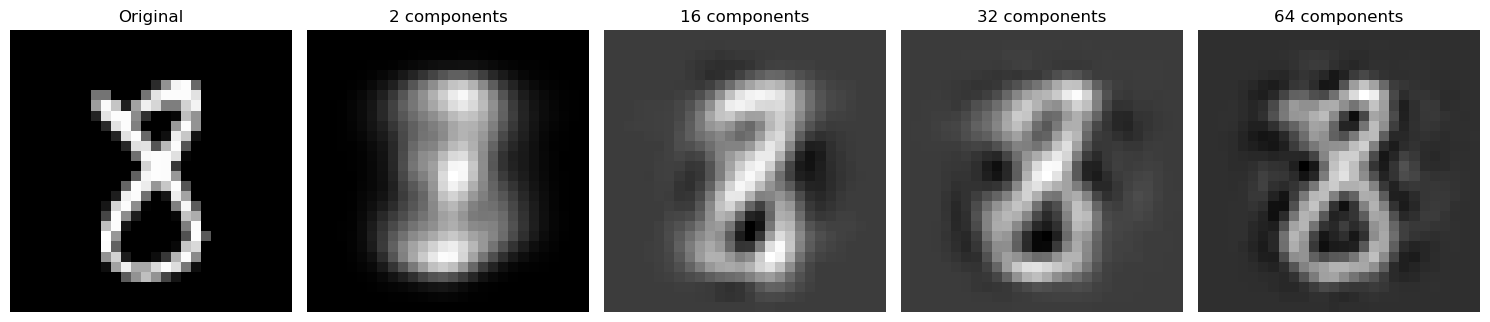

In [9]:
X = df2.iloc[:, 1:].values
y = df2.iloc[:, ].values

# Choosing the 101st digit
digit_to_visualize = X[100].reshape(28, 28)

# Different numbers of principal components to explore
components = [2, 16, 32, 64] #, 128, 256, 784]

fig, axes = plt.subplots(1, len(components) + 1, figsize=(15, 4))

# Plot the original digit
axes[0].imshow(digit_to_visualize, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original')

# Apply PCA, reconstruct the digit, and plot for different number of components
for i, num_components in enumerate(components, 1):
    pca = PCA(n_components=num_components)
    pca.fit(X)
    X_reconstructed = pca.inverse_transform(pca.transform(X[100].reshape(1, -1)))

    reconstructed_digit = X_reconstructed.reshape(28, 28)
    axes[i].imshow(reconstructed_digit, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'{num_components} components')

plt.tight_layout()
plt.show()

#### b) What changes as the number of principal components increases? Why?

The original image contains 784 principal components; therefore, when we apply the dimensionality reduction technique, we can clearly see that the higher the number of principal components, the more detailed (higher quality) is the representation of the handwritten number eight. If we were to further increase the number of principal components, at some point, we would reach a threshold where one could barely see the difference between the original and the replicate (with reduced dimensions), since a lower number of principal components leads to a loss of fine details initially.

#### c) Apply PCA on the original dataset and plot it in 2D (color the datapoints by the labels).

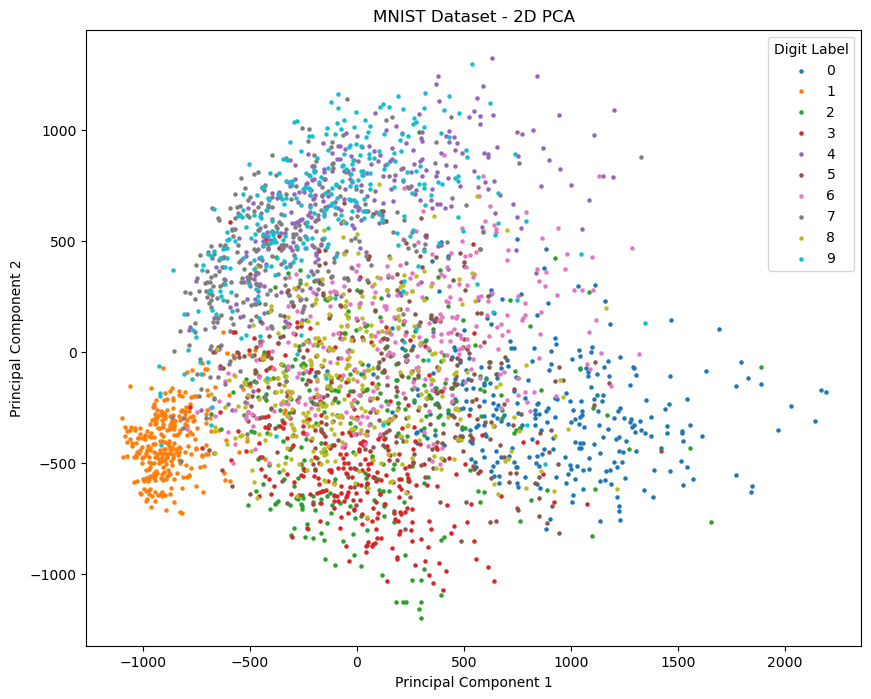

In [10]:
# # Apply PCA for 2 components
X = df2.iloc[:, 1:].values
y = df2.iloc[:, 0].values

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Get unique classes in the dataset
classes = np.unique(y)

# Plotting the 2D PCA-transformed data colored by labels
plt.figure(figsize=(10, 8))
for class_value in classes:
    indices = np.where(y == class_value)
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=str(class_value), s=5)

plt.title('MNIST Dataset - 2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Digit Label')
plt.show()


#### d) Apply t-SNE on the original dataset and plot it in 2D (color the datapoints by the labels). Set init='random', perplexity=15, n_iter=900 and random_state = 2.

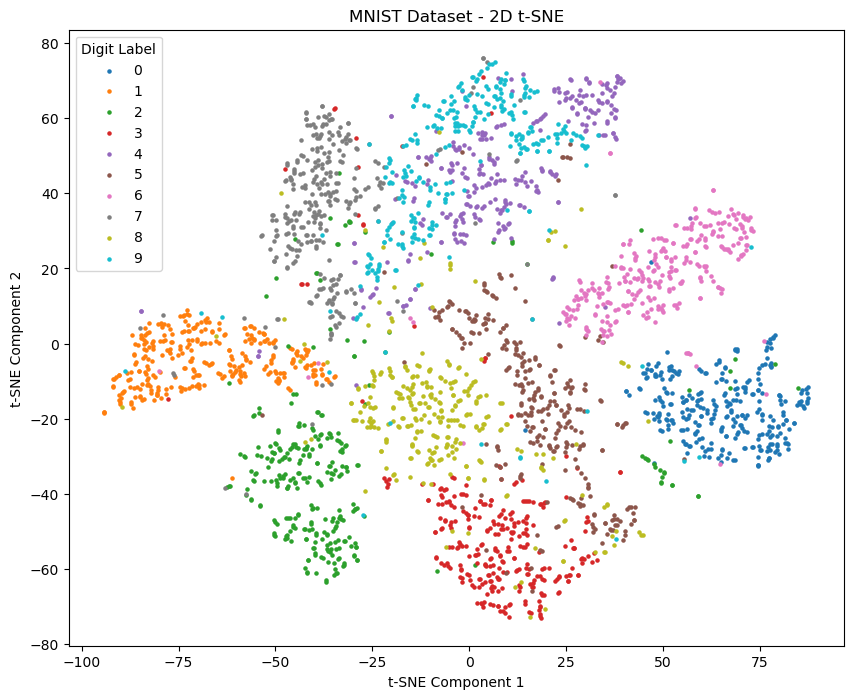

In [11]:
# Apply PCA for 2 components
X = df2.iloc[:, 1:].values
y = df2.iloc[:, 0].values
labels = df2['label']

# Apply t-SNE for 2 components
tsne = TSNE(n_components=2, init='random', perplexity=15, n_iter=900, random_state=2)
X_tsne = tsne.fit_transform(X)

# Get unique classes in the dataset
classes = np.unique(y)

# Plotting the 2D t-SNE-transformed data colored by labels
plt.figure(figsize=(10, 8))
for class_value in classes:
    indices = np.where(y == class_value)
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], label=str(class_value), s=5)


plt.title('MNIST Dataset - 2D t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Digit Label', loc=0)
plt.show()

### Q3) Kernel Ridege Regression

* In this question, we use a dataset of concrete to study kernel ridege regression. For both training and testing data, the first 8 columns are features of concrete and the last column is "Concrete compressive strenth". We will build a ridge regression model for the target variable, "Concrete compressive strength".

* Please refer to the following package for kernel ridge regression:\
https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html

In [12]:
df3_train = pd.read_excel('./Question3_train.xls')
df3_test = pd.read_excel('./Question3_test.xls')
df3_val = pd.read_excel('./Question3_validation.xls')

#### a) Standardize the training set. Then using the statistics of the training set to standardize the validation set and testing set.

In [13]:
from sklearn.preprocessing import StandardScaler

# Standardize the training set
scaler = StandardScaler()
df3_train_scaled = scaler.fit_transform(df3_train.iloc[:, :-1])

# Use the same scaler to standardize the validation and testing set
df3_test_scaled = scaler.transform(df3_test.iloc[:, :-1])
df3_val_scaled = scaler.transform(df3_val.iloc[:, :-1])

#### b) Train a ridge regression model on the training set and find the optimal hyper-parameters over the validation set.

Instructions:
* Use Gaussion kernels. *Hint:* `kernel=“rbf”`
* Use grid search to find the optimal values for the regularization parameter *alpha* and bandwidth parameter *gamma* on the validation set.
* Use the following alpha values: [1e-6, 5e-6, 1e-5, 1e-4, 1e-3] and gamma values: [1e-7, 5e-7, 1e-6, 5e-6, 1e-5]
* **Plot a heat map of the MSE on the validation set for the list of alpha and gamma values.** Please refer to the following package for heatmap:
https://seaborn.pydata.org/generated/seaborn.heatmap.html

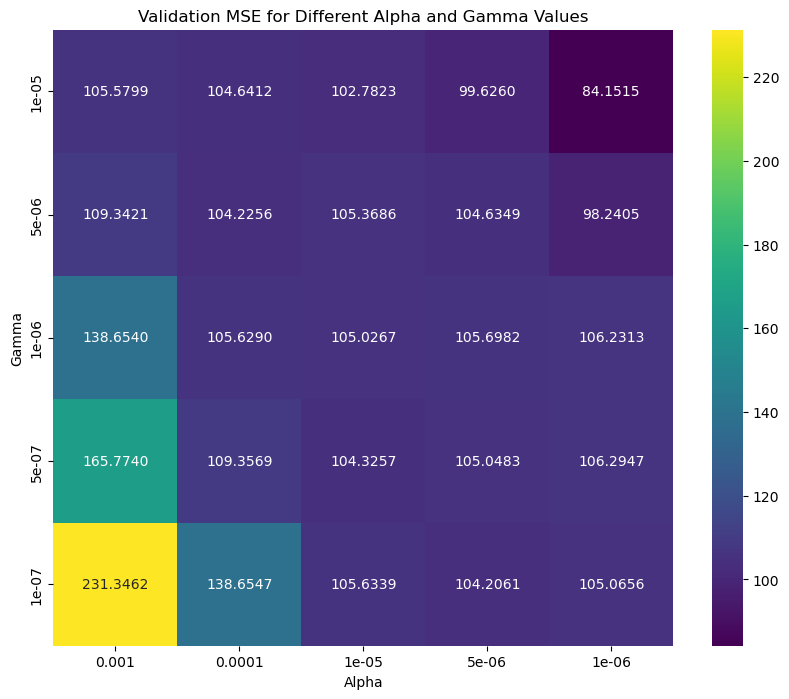

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error

# Define the alpha and gamma values for grid search
alphas = [1e-6, 5e-6, 1e-5, 1e-4, 1e-3]
gammas = [1e-7, 5e-7, 1e-6, 5e-6, 1e-5]

alphas = alphas[::-1]
gammas = gammas[::-1]

# Create a meshgrid for alpha and gamma values
alpha_mesh, gamma_mesh = np.meshgrid(alphas, gammas)

# Store the MSE values for each combination of alpha and gamma
mse_values = np.zeros_like(alpha_mesh)

# Perform grid search
for i in range(len(alphas)):
    for j in range(len(gammas)):
        alpha_val, gamma_val = alphas[i], gammas[j]
        
        # Train Ridge Regression model
        model = KernelRidge(kernel='rbf', alpha=alpha_val, gamma=gamma_val)
        model.fit(df3_train_scaled, df3_train.iloc[:, -1])
        
        # Predict on validation set
        y_pred = model.predict(df3_val_scaled)
        
        # Calculate MSE and store it
        mse = mean_squared_error(df3_val.iloc[:, -1], y_pred)
        mse_values[j, i] = mse  # Note: j and i are swapped for meshgrid

# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(mse_values, annot=True, fmt=".4f", xticklabels=alphas, yticklabels=gammas, cmap="viridis")
plt.title('Validation MSE for Different Alpha and Gamma Values')
plt.xlabel('Alpha')
plt.ylabel('Gamma')
plt.show()


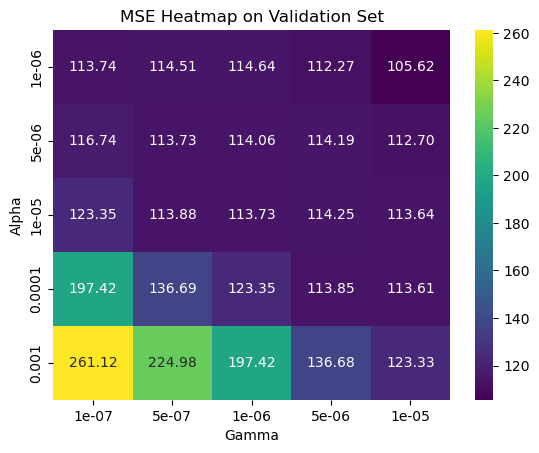

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error

# Define the parameter grid
param_grid = {'alpha': [1e-6, 5e-6, 1e-5, 1e-4, 1e-3],
              'gamma': [1e-7, 5e-7, 1e-6, 5e-6, 1e-5]}

# Create a Kernel Ridge regression model
kr = KernelRidge(kernel='rbf')

# Create the GridSearchCV object
grid_search = GridSearchCV(kr, param_grid, scoring='neg_mean_squared_error', cv=10)

# Fit the model on the training set
# grid_search.fit(df3_val_scaled, df3_val.iloc[:, -1])
grid_search.fit(df3_train_scaled, df3_train.iloc[:, -1])

# Get the best parameters
best_params = grid_search.best_params_
# print(f"Best parameters: {best_params}")
optimal_alpha = best_params['alpha']
optimal_gamma = best_params['gamma']

# Get the best model
optimal_model = grid_search.best_estimator_

# Training the model with the best parameters
optimal_model = KernelRidge(kernel='rbf', alpha=optimal_alpha, gamma=optimal_gamma)
optimal_model.fit(df3_train_scaled, df3_train.iloc[:, -1])

# Predict on the validation set
y_pred = optimal_model.predict(df3_val_scaled)

# Calculate MSE on the validation set
val_mse = mean_squared_error(df3_val.iloc[:, -1], y_pred)
# # print(f"Mean Squared Error on Validation Set: {val_mse}")

# Plot the heatmap
results = np.array((-1)*grid_search.cv_results_['mean_test_score']).reshape(len(param_grid['alpha']), len(param_grid['gamma']))
heatmap = sns.heatmap(results, annot=True, fmt=".2f", cmap="viridis", xticklabels=param_grid['gamma'], yticklabels=param_grid['alpha'])
plt.title('MSE Heatmap on Validation Set')
plt.xlabel('Gamma')
plt.ylabel('Alpha')
plt.show()


#### c) Report your optimal alpha and gamma in b).  Then test your optimal model on the testing set. Report the testing MSE.

In [16]:
# Test the optimal model on the testing set
test_predictions = optimal_model.predict(df3_test_scaled)
# test_mse = np.mean((test_predictions - df3_test.iloc[:, -1]) ** 2)
test_mse_svm = mean_squared_error(df3_test.iloc[:, -1], test_predictions)

print(f'Optimal Alpha: {optimal_alpha}')
print(f'Optimal Gamma: {optimal_gamma}')
print(f'Testing MSE: {test_mse_svm}')

Optimal Alpha: 1e-06
Optimal Gamma: 1e-05
Testing MSE: 101.2585119915071


#### d) How does the regularization and bandwidth parameter affect the bias and variance?

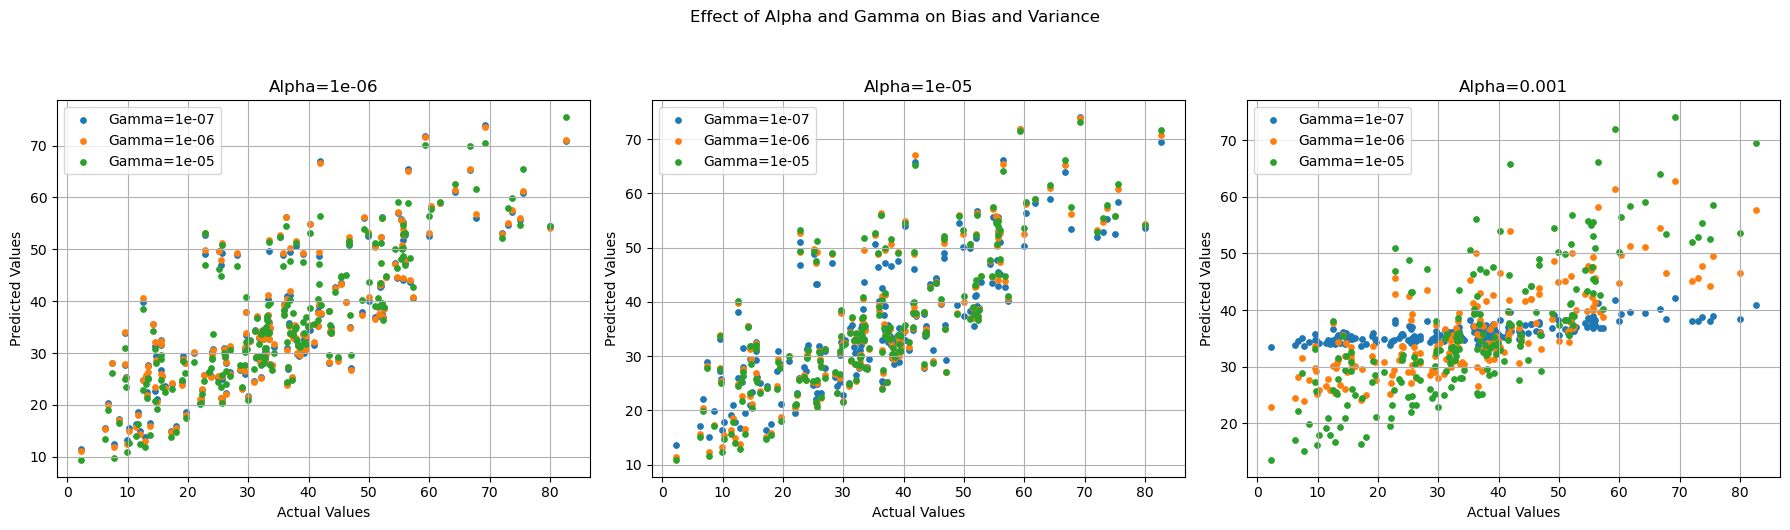

In [17]:
# Varying alpha and gamma
alphas = [1e-6, 1e-5, 1e-3]  # Regularization strength
gammas = [1e-7, 1e-6, 1e-5]  # Bandwidth

plt.figure(figsize=(18, 5))

# Loop over alpha values
for i, alpha in enumerate(alphas, 1):
    plt.subplot(1, 3, i)
    plt.title(f'Alpha={alpha}')
    
    # Loop over gamma values
    for gamma in gammas:
        model = KernelRidge(alpha=alpha, kernel='rbf', gamma=gamma)
        y_pred = model.fit(df3_train_scaled, df3_train.iloc[:, -1]).predict(df3_val_scaled)
        plt.scatter(df3_val.iloc[:, -1], y_pred, label=f"Gamma={gamma}", s=15)

    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid()
    plt.legend()

plt.suptitle('Effect of Alpha and Gamma on Bias and Variance', y=1.05)
plt.tight_layout()
plt.show()

The regularization parameter (alpha) and bandwidth parameter (gamma) play pivotal roles in Kernel Ridge Regression, influencing the trade-off between bias and variance. Larger values of alpha tend to increase bias and decrease variance, as heightened regularization simplifies the model. This simplicity introduces bias towards a more straightforward representation, resulting in a model that is less prone to variations in the training data. Conversely, the bandwidth parameter, gamma, exhibits a contrasting effect. Lower gamma values lead to a smoother decision boundary, potentially increasing bias by oversimplifying the model. On the other hand, higher gamma values increase model complexity, making it more sensitive to individual data points and, consequently, increasing variance. Striking a balance between regularization and model complexity is crucial for achieving optimal predictive performance and generalization to unseen data in Kernel Ridge Regression.
Both effects are best illustrated in the plot on the right side, however, as the plots in the middle and to the left show, at some point when the alpha and gamma values approach zero, there effect tends to shrink.

#### (e) Train an OLS linear regression using the training set.  Evalaute the learnt model using the testing set. Please report the testing MSE.

In [18]:
from sklearn.linear_model import LinearRegression

# Train an OLS linear regression model
ols_model = LinearRegression()
ols_model.fit(df3_train.iloc[:, :-1], df3_train.iloc[:, -1])

# Evaluate the OLS model on the testing set
test_predictions_ols = ols_model.predict(df3_test.iloc[:, :-1])
test_mse_ols = mean_squared_error(df3_test.iloc[:, -1], test_predictions_ols)

print(f'Testing MSE for OLS model: {test_mse_ols}')

Testing MSE for OLS model: 130.69064900748097


#### (f) Compare the testing MSE in c) and e). Which one is better? Why?

In [19]:
print(f'Testing MSE of Kernel SVM: {test_mse_svm}')
print(f'Testing MSE of OLS model: {test_mse_ols}')

Testing MSE of Kernel SVM: 101.2585119915071
Testing MSE of OLS model: 130.69064900748097


Given the two testing errors, the Kernel SVM outperforms the classical OLS, which could be due to the fact that the linearity assumption of linear regression is slightly compromised, as indicated by the plot below. In summary, the Kernel SVM's capability to model non-linear relationships may have enabled it to more accurately capture the underlying patterns in the data, resulting in a lower testing MSE compared to the OLS model.

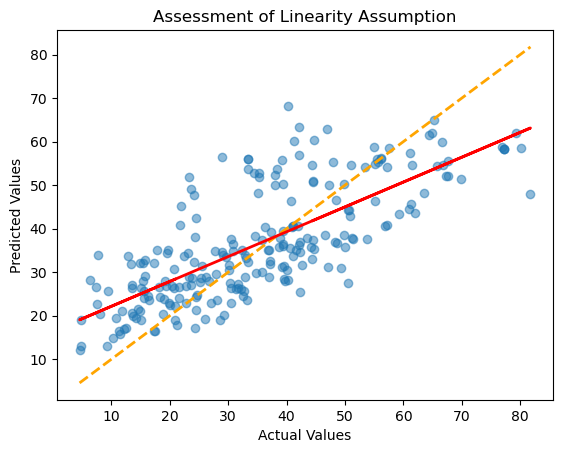

In [20]:
# Fitting a linear regression model
model = LinearRegression()
model.fit(df3_train.iloc[:, :-1], df3_train.iloc[:, -1])

# Making predictions on the test set
y_pred = model.predict(df3_test.iloc[:, :-1])

# Creating a scatter plot to assess linearity
plt.scatter(df3_test.iloc[:, -1], y_pred, color='C0', alpha=0.5)
plt.plot([min(df3_test.iloc[:, -1]), max(df3_test.iloc[:, -1])], [min(df3_test.iloc[:, -1]), max(df3_test.iloc[:, -1])], linestyle='--', color='orange', linewidth=2)

# Adding the regression line
regression_line = np.polyfit(df3_test.iloc[:, -1], y_pred, 1)
plt.plot(df3_test.iloc[:, -1], np.polyval(regression_line, df3_test.iloc[:, -1]), color='red', linewidth=2, label='Regression Line')


# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Assessment of Linearity Assumption')

plt.show()


### Q4) Kernel SVM

* In this question, we use the spam dataset to study kernel SVM. For both training and testing data, the first 57 columns are different features of emails and the last column shows whether an email is spam (1 for spam). We will build a kernel SVM model to classify spam emails.

* We will train kernel SVM classifier models on the training dataset and explore how the classification error on the testing set changes with the parameter gamma. 
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Instructions:
* Train kernel SVM on the training set and make sure you use Gaussian kernels. *Hint:* `kernel=“rbf”`
* Fix the paramerter C = 100, change gamma values from [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]
* **How does the parameter gamma affect the classification?**



In [21]:
df4_train = pd.read_csv('./Question4_train.csv')
df4_test = pd.read_csv('./Question4_test.csv')

#### a) Standardize the training set. Then using the statistics of the training set to standardize the testing set.

In [22]:
# Standardize the training set
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(df4_train.iloc[:, :-1])

# Use the same scaler to standardize the testing set
test_features_scaled = scaler.transform(df4_test.iloc[:, :-1])

#### b) Train kernel SVM on the training set using Gaussian kernels (Hint: `kernel=“rbf”`). Fix the paramerter C = 100, change gamma values from [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4].  Report the misclassification errors on both the standardized training set and the standardized testing set with respect to different gamma values. 

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

gamma_values = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]
train_errors = []
test_errors = []

for gamma in gamma_values:
    model = SVC(kernel='rbf', C=100, gamma=gamma)
    model.fit(train_features_scaled, df4_train.iloc[:, -1])
    
    train_predictions = model.predict(train_features_scaled)
    test_predictions = model.predict(test_features_scaled)

    train_error = 1 - accuracy_score(df4_train.iloc[:, -1], train_predictions)
    test_error = 1 - accuracy_score(df4_test.iloc[:, -1], test_predictions)
    
    # train_error = 1 - model.score(train_features_scaled, df4_train.iloc[:, -1])
    # test_error = 1 - model.score(test_features_scaled, df4_test.iloc[:, -1])
    
    train_errors.append(train_error)
    test_errors.append(test_error)

# Report the classification errors
for i, gamma in enumerate(gamma_values):
    print(f"Gamma: {gamma}, Train Error: {train_errors[i]}, Test Error: {test_errors[i]}")


Gamma: 0.0001, Train Error: 0.06630434782608696, Test Error: 0.07495926127104835
Gamma: 0.001, Train Error: 0.05507246376811592, Test Error: 0.06518196632265072
Gamma: 0.01, Train Error: 0.017028985507246408, Test Error: 0.07224334600760451
Gamma: 0.1, Train Error: 0.0028985507246376274, Test Error: 0.09668658337859859
Gamma: 1, Train Error: 0.0007246376811593791, Test Error: 0.21184139054861484
Gamma: 10.0, Train Error: 0.00036231884057968955, Test Error: 0.2552960347637153
Gamma: 100.0, Train Error: 0.00036231884057968955, Test Error: 0.2786529060293319
Gamma: 1000.0, Train Error: 0.0, Test Error: 0.3047256925583922
Gamma: 10000.0, Train Error: 0.0, Test Error: 0.32156436719174364


#### c) How does the parameter gamma affect the classification?

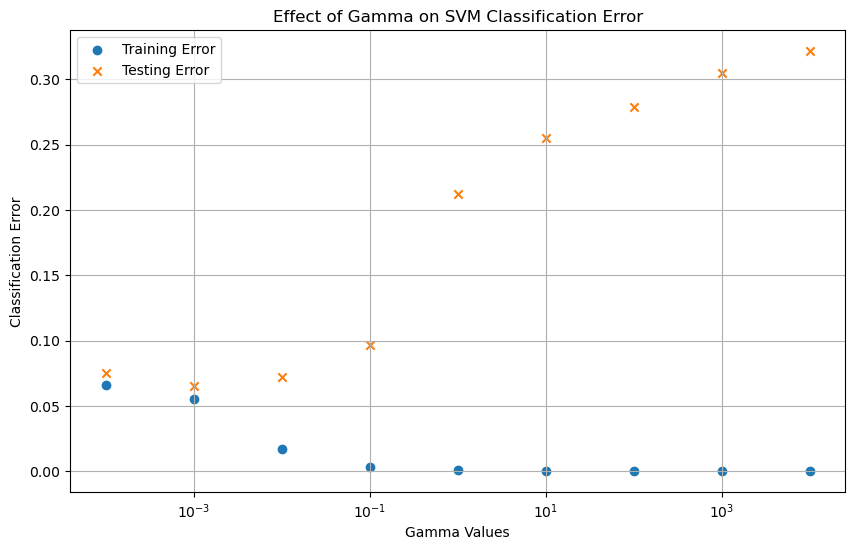

In [24]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(gamma_values, train_errors, label='Training Error', marker='o')
plt.scatter(gamma_values, test_errors, label='Testing Error', marker='x')
plt.xscale('log')  # Set x-axis to a logarithmic scale for better visualization
plt.xlabel('Gamma Values')
plt.ylabel('Classification Error')
plt.title('Effect of Gamma on SVM Classification Error')
plt.legend()
plt.grid()
plt.show()

As gamma increases, these models gain flexibility and become more capable of capturing intricate patterns in the training data. However, higher values of gamma also raise the risk of overfitting, where the model becomes too sensitive to noise and specifics of the training set, potentially leading to poorer generalization on unseen data. Therefore, the choice of gamma is crucial in balancing the trade-off between model flexibility and the risk of overfitting in Kernel SVMs. In fact, the plot shows that the error on the training set is approaching 0.00 very quickly, at the same time the error on the testing set starts to increase which is clearly a sign of overfitting.

#### d) Compare the misclassification errors on the testing set in b) with those obtained by linear SVM in 1d) of HW2. Is the kernel SVM better than linear SVM? Why?

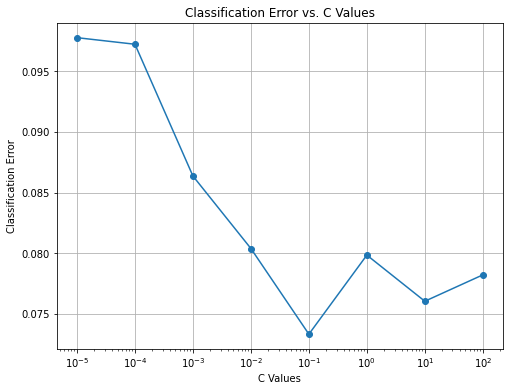

Comparing the misclassification errors on the testing set between the kernel SVM in question Q4b) and the linear SVM in HW2's question 1d), it is evident that the kernel SVM demonstrates a slight improvement in performance. With an optimal parameter C* of 0.1, the linear SVM achieves a classification error of 0.0733 (plot above). On the other hand, utilizing a gamma value of 0.001, the kernel SVM achieves a lower classification error of 0.0652. This indicates that, under the given conditions, the kernel SVM outperforms the linear SVM in terms of classification accuracy. The kernel SVM's ability to capture non-linear relationships in the data appears to contribute to its enhanced predictive performance on the testing set compared to the linear SVM.